In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import plotly.express as px

import os

def data_fname_split(fn, param='fname'):
    f1 = os.path.split(fn)
    f2 = os.path.splitext(f1[1])
    if param=='fname':
        res = f2[0]
    elif param=='ext':
        res = f2[1]
    elif param=='path':
        res = f1[0]

    return res

def read_raw(im_fname,crop_flag=0, preview_flag=0):

    hdr = []
    l = os.stat(im_fname).st_size # size in bytes
    ext = data_fname_split(im_fname,'ext')
    L_hdr = 0
    if ext in ['.fxd','.FXD','.raw','.RAW','']:
        if l==13824000:  #Pixium 3543 EZ, indeks 7
            im_size = [2880, 2400]
            #Mode informacije
            DetInfo = {'Index':7, 'Name': 'Trixell3543EZ', 'Type': 'DR', 'LinMax':65535, 'PixelSize':0.148}
        elif l==16588800:  #Pixium 4143 ili 4343, indeks 3
            im_size = [2880, 2880]
            # Mode informacije
            DetInfo = {'Index': 3, 'Name': 'Trixell4143/4343EZ', 'Type': 'DR', 'LinMax': 65535, 'PixelSize': 0.148}
        elif l==19481282:  #Pixium 4600, indeks 0
            im_size = [3121, 3121]
            # Mode informacije
            DetInfo = {'Index': 0, 'Name': 'TrixellPixium4600', 'Type': 'DR', 'LinMax': 16384, 'PixelSize': 0.143,
                       'Xmin':60, 'Ymin':60, 'Nx':3001, 'Ny':3001} #Aktivni deo slike
        elif l==14400000:  #Trixell Pixium portable 3543, indeks 4
            im_size = [2400, 3000]
            # Mode informacije
            DetInfo = {'Index': 4, 'Name': 'TrixellPixium3543', 'Type': 'DR', 'LinMax': 65535, 'PixelSize': 0.144}
        elif l==5990400: #TRix 2430EZ, indeks 5
            im_size = [1920, 1560]
            # Mode informacije
            DetInfo = {'Index': 5, 'Name': 'Trixell2430EZ', 'Type': 'DR', 'LinMax': 65535, 'PixelSize': 0.148}
        elif l==18481152:  #Toshiba 4343
            im_size = [3072, 3008]
            # Mode informacije
            DetInfo = {'Index': 1, 'Name': 'Toshiba4343', 'Type': 'DR', 'LinMax': 13000, 'PixelSize': 0.143}
        elif l==18458880: #Toshiba 4343 RPW
            im_size = [3036,3040]
            # Mode informacije
            DetInfo = {'Index': 29, 'Name': 'Toshiba4343RPW', 'Type': 'DR', 'PixelSize': 0.140}
        elif l==14993280:  #Toshiba 3543_W
            im_size = [2466, 3040]
            # Mode informacije
            DetInfo = {'Index': 30, 'Name': 'Toshiba3543W', 'Type': 'DR', 'PixelSize': 0.140}
        elif l==18874368:  #Varian PaxScan4343, Rayence, DRTech EVS, Pixxgen
            im_size = [3072, 3072]
            if im_fname.find('Samsung'):  #Vrlo niskobudzetno testiranje za Samsung
                # Mode informacije
                DetInfo = {'Index': 2, 'Name': 'Rayence1717', 'Type': 'DR', 'LinMax':16536, 'PixelSize': 0.143}
            elif im_fname.find('DRTech'):
                # Mode informacije
                DetInfo = {'Index': 13, 'Name': 'DRTech4343EVS', 'Type': 'DR', 'LinMax': 16536, 'PixelSize': 0.140}
            elif im_fname.find('Toshiba'):
                # Mode informacije
                DetInfo = {'Index': 1, 'Name': 'Toshiba4343', 'Type': 'DR', 'LinMax': 13000, 'PixelSize': 0.143}
            elif im_fname.find('Pixxgen'):  #Pixxgen 1717
                # Mode informacije
                DetInfo = {'Index': 40, 'Name': 'Pixxgen1717', 'Type': 'DR', 'LinMax': 32422, 'PixelSize': 0.140}
            else:  #Inace Varex
                # Mode informacije
                DetInfo = {'Index': 26, 'Name': 'Varex4343', 'Type': 'DR', 'LinMax': 60000, 'PixelSize': 0.139}
        elif l==13041663:  #Careray 1500P
            im_size = [2304, 2816]
            # Mode informacije
            DetInfo = {'Index': 9, 'Name': 'Careray1500P', 'Type': 'DR', 'LinMax': 47000, 'PixelSize': 0.154}
        elif l==12976128:  #Careray 1500CW
            im_size = [2304, 2816]
            # Mode informacije
            DetInfo = {'Index': 8, 'Name': 'Careray1500CW', 'Type': 'DR', 'LinMax': 47000, 'PixelSize': 0.154}
        elif l==15859712:  #Careray 1800R
            im_size = [2816,2816]
            # Mode informacije
            DetInfo = {'Index': 10, 'Name': 'Careray1800R', 'Type': 'DR', 'LinMax': 47000, 'PixelSize': 0.154}
        elif l==15212544:  #Varex 4336Wv4
            im_size = [3072, 2476]
            # Mode informacije
            DetInfo = {'Index': 27, 'Name': 'Varex4336Wv4', 'Type': 'DR', 'LinMax': 6e4, 'PixelSize': 0.139}
        elif l==30723840: #PerkinElmer XRPAD 4336
            im_size = [4320, 3556]
            # Mode informacije
            DetInfo = {'Index': 11, 'Name': 'PerkinElmerXRPAD4336', 'Type': 'DR', 'LinMax': 16384, 'PixelSize': 0.100}
        elif l==18013216:  #Rayence 14x17
            im_size = [2756, 3268]
            # Mode informacije
            DetInfo = {'Index': 17, 'Name': 'Rayence1417', 'Type': 'DR', 'LinMax': 16384, 'PixelSize': 0.143}
        elif l==11790368:  #Konica AeroDR 1717 (20)
            im_size = [2428, 2428]
            # Mode informacije
            DetInfo = {'Index': 20, 'Name': 'KonicaAeroDR1717', 'Type': 'DR', 'LinMax': 4095, 'PixelSize': 0.175}
        elif l==9690840:  #Konica AeroDR 1417, indeks 21
            im_size = [2430, 1994]
            # Mode informacije
            DetInfo = {'Index': 21, 'Name': 'KonicaAeroDR1417', 'Type': 'DR', 'LinMax': 4095, 'PixelSize': 0.175}
        elif l==4762368:  #Konica AeroDR 1012, indeks 22
            im_size = [1696, 1404]
            # Mode informacije
            DetInfo = {'Index': 22, 'Name': 'KonicaAeroDR1012', 'Type': 'DR', 'LinMax': 4095, 'PixelSize': 0.175}
        elif l==12902400:  #iRay 1417 (62)
            im_size = [2800, 2304]
            # Mode informacije
            DetInfo = {'Index': 62, 'Name': 'iRay1417', 'Type': 'DR', 'LinMax': 13000, 'PixelSize': 0.150}
        elif l==13105152:  #iRay 1417 (63)
            im_size = [2844, 2304]
            # Mode informacije
            DetInfo = {'Index': 63, 'Name': 'iRay1417', 'Type': 'DR', 'LinMax': 13000, 'PixelSize': 0.150}
        elif l==31195136:  #iRay Mars1417X (67)
            im_size = [4352, 3584]
            # Mode informacije
            DetInfo = {'Index': 67, 'Name': 'iRay1417X', 'Type': 'DR', 'LinMax': 65535, 'PixelSize': 0.100}
        elif l==15728640:  #Pixxgen 1417 (81)
            im_size = [3072, 2560]
            # Mode informacije
            DetInfo = {'Index': 41, 'Name': 'Pixxgen1417', 'Type': 'DR', 'LinMax': 65535, 'PixelSize': 0.140}

        # R&F slike
        elif l==1843200:  #RF Trixell, 3x3 binning
            im_size = [960, 960]
            # Mode informacije
            DetInfo = {'Index': 104}
        elif l==1843456:   #RF Trixell, 3x3 binning, 960x960, sa zaglavljem 256 bita
            im_size = [960, 960]
            L_hdr = 256  # zaglavlje formata
            # Mode informacije
            DetInfo = {'Index': 104, 'Name': 'Trixel4343RF', 'Type': 'RF', 'LinMax': 45000, 'PixelSize': 3 * 0.148,
                       'Xmin':0, 'Ymin':0, 'Nx':960, 'Ny':960}  # aktivni deo slike
        elif l==2097408:  #Varex 4343DXV, 3x3 binning, 1024x1024, zaglavlje 256
            im_size = [1024, 1024]
            L_hdr = 256  # zaglavlje formata
            # Mode informacije
            DetInfo = {'Index': 205, 'Name': 'Varex4343DXV', 'LinMax': 50000, 'PixelSize': 0.417,
                       'Xmin':0, 'Ymin':0, 'Nx':1024, 'Ny':1024}  # aktivni deo slike
        else:
            print('Nepoznat detektor, duzina '+str(l))
            return
        # ucitaj sliku odgovarajuce velicine
        f = open(im_fname, 'rb')
        im = np.fromfile(f, np.dtype('uint16'))
        im = im[:im_size[0]*im_size[1]]
        hdr = im[:L_hdr].astype(np.uint8)
        im = im.reshape(im_size)

    elif ext == '.dcm':
        print()
        #dicom ucitavanje
    else:
        print('Unrecognised panel format!')
        return

    f.close()

    if not list(im.shape)==im_size:
        print('Error reading image. Detektor: '+ str(DetInfo['Index']) +' Treba da je velicina '+ str(im_size)
              +' a u stvari je  ' + ''.join(str(el) for el in im.shape))
        im = []
        prev_im = []
        return

    # Neophodne korekcije slika
    if DetInfo['Index']==11:
        im[im>16384] = 16384  # korigujemo zasicenje na 16 bita umesto na 14
    elif DetInfo['Index']==104:  #Trixell RF 3x3 mod, fali  prva kolona
        im[:,0] = im[:,1]  #kopiramo drugu

    # Isecanje neaktivnog dela slike
    if crop_flag and im.shape[0]>1000:  #I da nije prikaz (1/4 rezolucije)
        if DetInfo['Index']==0:  #Trixell Pixium 4600
            im = im[DetInfo['Ymin']:DetInfo['Ymin']+DetInfo['Ny'], DetInfo['Xmin']: DetInfo['Xmin'] + DetInfo['Nx']];
        elif DetInfo['Index']==1:  #Toshiba 4343
            im = im[32:3040,:]
        elif DetInfo['Index']==2:  #Varian PaxScan4343
            im = im[10:3062, 10:3062]  #varian 4343
        elif DetInfo['Index']==3:  #Trixell 4143 ili 4343
            # Odluci da li je 4143 ili 4343
            if sum(sum(im[99: 150, 2809: 2860])) == 0:
                im = im[4:2876, 32:2804] #Trix 4143
            else:
                im = im[4:2876, 32:2868] #Trix 4343
        elif DetInfo['Index']==7:  #Trixell 3543 EZ
            im = im[24:2864,34:2366]
        elif DetInfo['Index']==9:  #Careray
            im = im[6:2298,6:2810]
        elif DetInfo['Index']==10:  #Careray 1800R
            im = im[6:2810,6:2810]
        elif DetInfo['Index']==13:  #DRTech EVS
            im = im[20:3052,20:3052]
        elif DetInfo['Index']==21:  #Konica 1417
            im = im[:2428,:1992]
        elif DetInfo['Index']==22:  #Konica 1012
            im = im[:1692,:1404]
        elif DetInfo['Index']==26:  #Varian 4343v3/RC
            im = im[20:3052,20:3052]
        elif DetInfo['Index']==27:  #Varian 4336Wv4
            im = im[20:3052,20:2456]
        elif DetInfo['Index']==41:  #Pixxgen 1417
            im = im[:3052,:2500]
        elif DetInfo['Index']==67:  #iRay Mars1417X
            im = im[26:4326,42:3542]

    # izlazna lista
    out = [im, DetInfo, hdr]

    # simuliranje preview slika

    if preview_flag:
        prev_im = []
        if DetInfo['Index']==0:  #Pixium 4600, redukujemo rezoluciju na 1/4
            if im.shape[0]!=3001:
                prox_im = im[60:3060,60:3060]
            else:
                prox_im = im[:3000, :3000]
            prev_im = np.uint16(prox_im[0:3000:4, 0:3000:4])
        elif DetInfo['Index'] in [4,7,20,21,27]:  #Trixell 4143, Varian, Samsung i Imix imaju sliku iste velicine
            prev_im = im[2::4, 2::4]

        out.append(prev_im)

    return out

In [ ]:
def pronalazenje_frekvencije_smetnje(spektar):

    #Logaritmovanje apsolutne vrednost spektra i pretvaranje u uint8 tip (potrebno za threshold funkciju)
    spektar_uint8 = (np.log(abs(spektar)+1)).astype(np.uint8)

    #Binarizovanje spektra postavljanjem automatski odredjenog praga
    _, spektar_b = cv2.threshold(spektar_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.imshow(spektar_b, cmap='gray')
    plt.title('Binarna slika')
    plt.show()

    #Erozija binarne slike
    kernel = np.ones((11, 11), np.uint8)
    spektar_b = cv2.erode(spektar_b, kernel, iterations=1)

    plt.imshow(spektar_b, cmap='gray')
    plt.title('Erozija')
    plt.show()

    #Sa desne strane na simetricnoj poziciji je komponetna suma
    #Sumiraju se sve vrednoti po kolonama i dele sa 255 jer je to vrednost jednog belog piksela
    #Iteracije se vrse sa leve strane slike ka desnoj
    #Ako nadjemo u kolonu u kojoj je broj belih piksela porastao za 15 u odnosu na prethodnu, smatramo da smo pronasli pravu frekvenciju
    sumaKolone = spektar_b.sum(axis=0) / 255
    kolona = 1 #krecemo od prve posto poredimo prvo nultu
    while kolona < len(spektar_b[0]) / 2 and sumaKolone[kolona] <= 15 + sumaKolone[kolona - 1]:
        kolona += 1

    return kolona

In [ ]:
def gaussNotch(H_size, D0, u0, v0):
    u = np.arange(H_size[1]) - np.floor(H_size[1] / 2)
    v = np.arange(H_size[0]).reshape(-1, 1) - np.floor(H_size[0] / 2)


    # Izračunavanje udaljenosti D1 i D2
    D1 = np.sqrt((u - u0) ** 2 + (v - v0) ** 2)
    D2 = np.sqrt((u + u0) ** 2 + (v + v0) ** 2)

    #Formiranje notch filtra
    H = 1 - np.exp(-0.5 * ((D1 * D2) / (D0 ** 2)))

    return H

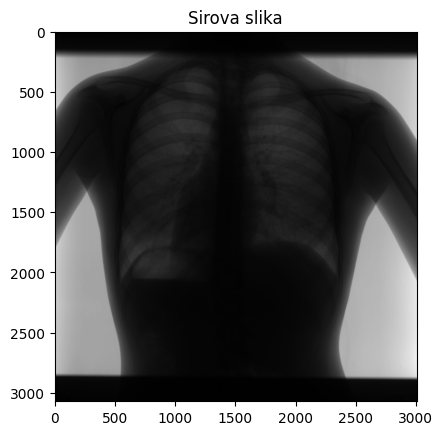

In [ ]:
[im, _, _] = read_raw('CHEST_PA_N_120_100_0.8_0_7.fxd')
plt.imshow(im, cmap='gray')
plt.title("Sirova slika")
plt.show()

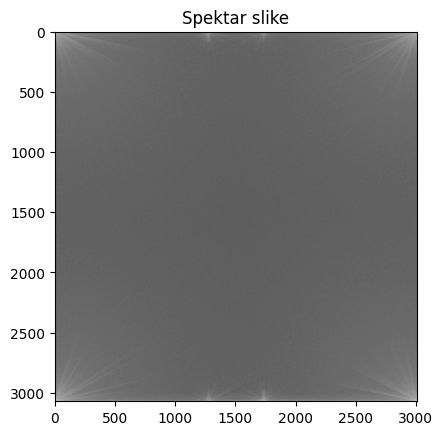

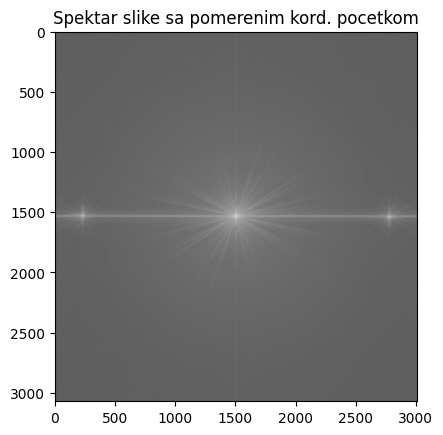

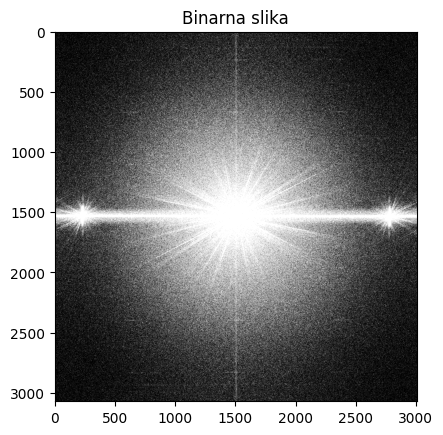

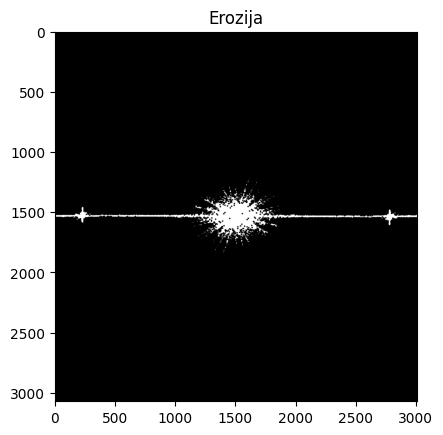

220

In [ ]:
spektar = np.fft.fft2(im)
plt.imshow(np.log(abs(spektar)+1), cmap='gray')
plt.title("Spektar slike")
plt.show()

spektar = np.fft.fftshift(spektar)
plt.imshow(np.log(abs(spektar)+1), cmap='gray')
plt.title("Spektar slike sa pomerenim kord. pocetkom")
plt.show()

#Pronalazenje frekvencije smetnje
f = pronalazenje_frekvencije_smetnje(spektar)
f

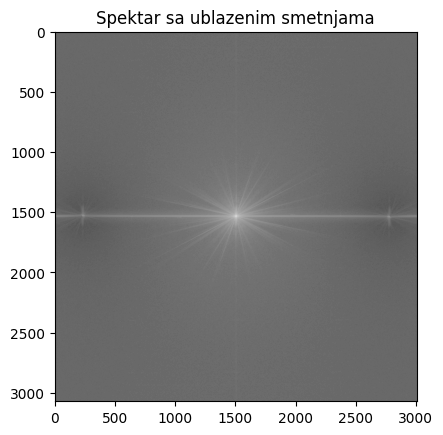

In [ ]:
#Formiranje filtra
notch = gaussNotch(im.shape, 1000,-round(im.shape[1]/2) + f, 0)


#Filtriranje
spektar = spektar * notch
plt.imshow(np.log(abs(spektar)+1), cmap='gray')
plt.title("Spektar sa ublazenim smetnjama")
plt.show()

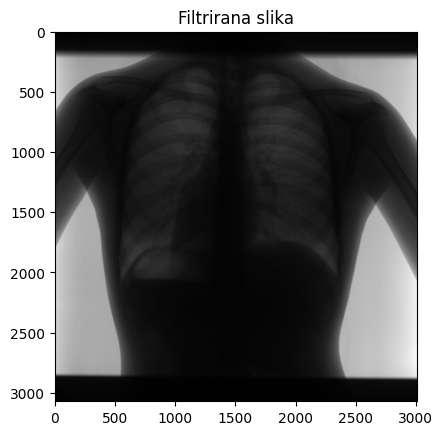

In [ ]:
#Povratak iz frekvencijskog domena
rezultat = np.real(np.fft.ifft2(np.fft.ifftshift(spektar)))
plt.imshow(rezultat, cmap='gray')
plt.title("Filtrirana slika")
plt.show()